In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
df = pd.read_csv('/content/Airbnb_Open_Data.csv')

/tmp/ipython-input-1860991289.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Airbnb_Open_Data.csv')


In [20]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62588 entries, 0 to 62587
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              62588 non-null  int64  
 1   NAME                            62375 non-null  object 
 2   host id                         62588 non-null  int64  
 3   host_identity_verified          62371 non-null  object 
 4   host name                       62328 non-null  object 
 5   neighbourhood group             62559 non-null  object 
 6   neighbourhood                   62572 non-null  object 
 7   lat                             62580 non-null  float64
 8   long                            62580 non-null  float64
 9   country                         62265 non-null  object 
 10  country code                    62502 non-null  object 
 11  instant_bookable                62502 non-null  float64
 12  cancellation_policy             

In [22]:
df.duplicated().value_counts()

,count
False,62588


In [23]:
df.drop_duplicates(inplace = True)

# Clean 'price' and 'service fee' columns and convert to numeric
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('[$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Rename the price and service fee columns to include a dollar sign
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)

# Fill missing numerical values with the mean
for col in ['lat', 'long', 'instant_bookable', 'Construction year', 'price_$', 'service_fee_$', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical values with the mode
for col in ['NAME', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'country', 'country code', 'cancellation_policy', 'room type']:
     if col in df.columns:
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col].fillna(mode_value[0], inplace=True)
        else:
            df[col].fillna('', inplace=True)


# Fill missing 'last review' with empty strings
df['last review'].fillna('', inplace=True)
df['house_rules'].fillna('', inplace=True)


# Change all mismatched data types to the appropriate ones
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
# Convert 'last review' to datetime after filling NaNs
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['Construction year'] = df['Construction year'].astype(int)

# Correct the spelling of 'brookin' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookin', 'neighbourhood group'] = 'Brooklyn'

# Get rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365'] > 500].index)

/tmp/ipython-input-742094476.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-742094476.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [24]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,62588.000000,62588.000000,62588.000000,62588.000000,62588.000000,62588.000000,62588.000000,62588.000000,51880,62588.000000,62588.000000,62588.000000,62588.000000
mean,40.728062,-73.949473,0.496352,2012.493673,624.431278,124.844412,7.563689,28.022935,2019-08-04 21:30:28.589051392,1.487007,3.305081,8.207245,156.011070
min,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688640,-73.982921,0.000000,2008.000000,338.000000,68.000000,1.000000,1.000000,2018-12-15 00:00:00,0.350000,2.000000,1.000000,23.000000
50%,40.722430,-73.954550,0.000000,2012.000000,624.431278,124.844412,3.000000,7.000000,2019-06-17 00:00:00,1.280000,3.000000,1.000000,135.000000
75%,40.762760,-73.931920,1.000000,2017.000000,911.000000,182.000000,5.000000,29.000000,2021-11-10 00:00:00,1.860000,4.000000,2.000000,283.000000
max,40.916850,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.055774,0.049963,0.499647,5.754816,331.490828,66.288118,35.319513,52.460656,NaN,1.686656,1.267454,33.498892,133.812131


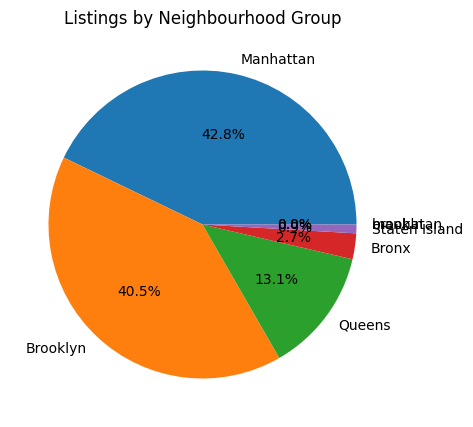

In [25]:
plt.figure(figsize=(8,5))
df['neighbourhood group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Listings by Neighbourhood Group')
plt.ylabel('')
plt.show()

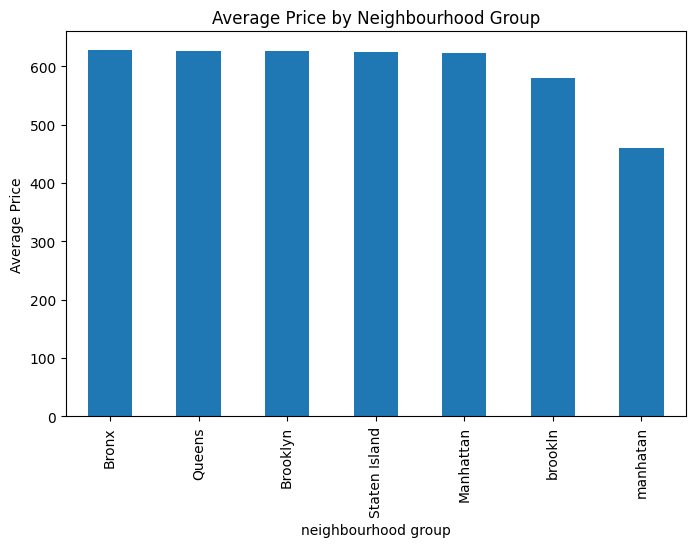

In [26]:
plt.figure(figsize=(8,5))
df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Price by Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

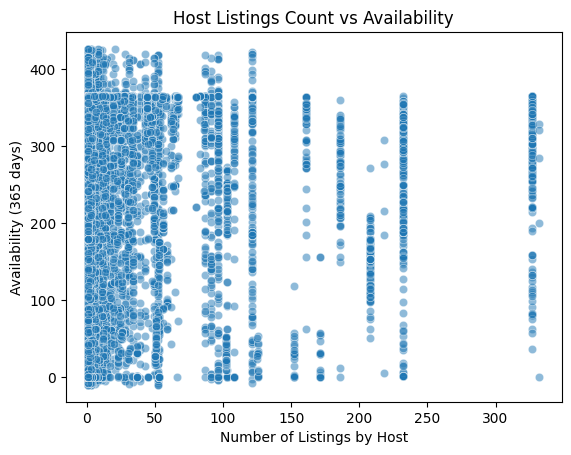

In [27]:
sns.scatterplot(data=df, x='calculated host listings count', y='availability 365', alpha=0.5)
plt.title('Host Listings Count vs Availability')
plt.xlabel('Number of Listings by Host')
plt.ylabel('Availability (365 days)')
plt.show()